In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_llm = pd.read_csv(
    "summarizer_logs/comp-ratio-0.9/summarization-llm/summarizer_results_20250126.csv"
)
df_prompting = pd.read_csv(
    "summarizer_logs/only-prompting/comp-ratio-0.9/summarizer_results_20250126_231649.csv"
)

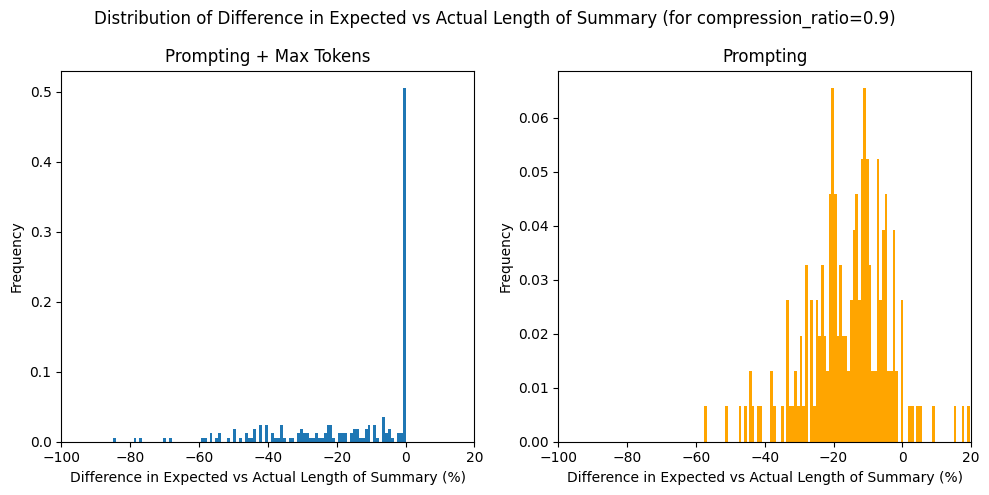

In [6]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121)
ax.hist(
    df_llm["percent_difference_in_length_tokens"] * 100,
    bins=100,
    density=True,
    label="Prompting + Max Tokens",
)
ax2 = fig.add_subplot(122)
ax2.hist(
    df_prompting["percent_difference_in_length_words"] * 100,
    bins=100,
    density=True,
    label="Prompting",
    color="orange",
)
ax.set_xlabel("Difference in Expected vs Actual Length of Summary (%)")
ax.set_ylabel("Frequency")
ax.set_title("Prompting + Max Tokens")
ax.set_xlim(-100, 20)
ax2.set_xlabel("Difference in Expected vs Actual Length of Summary (%)")
ax2.set_ylabel("Frequency")
ax2.set_title("Prompting")
ax2.set_xlim(-100, 20)
plt.suptitle(
    "Distribution of Difference in Expected vs Actual Length of Summary (for compression_ratio=0.9)"
)
plt.tight_layout()
plt.savefig("assets/summary_length_comparison.png")
plt.show()

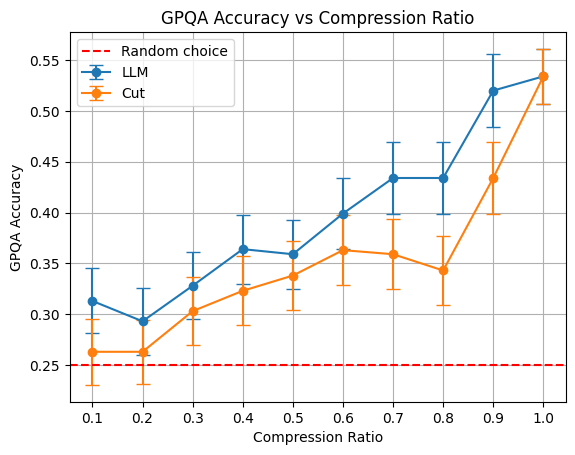

In [3]:
df = pd.read_csv("assets/gpqa_results.csv")

plt.errorbar(
    df["compression_ratio"],
    df["llm_accuracies"],
    yerr=df["llm_stderrs"],
    fmt="o-",
    capsize=5,
    label="LLM",
)
plt.errorbar(
    df["compression_ratio"],
    df["cut_accuracies"],
    yerr=df["cut_stderrs"],
    fmt="o-",
    capsize=5,
    label="Cut",
)
plt.xlabel("Compression Ratio")
plt.ylabel("GPQA Accuracy")
plt.title("GPQA Accuracy vs Compression Ratio")
plt.axhline(0.25, color="red", linestyle="--", label="Random choice")
plt.legend()
plt.xticks(df["compression_ratio"])
plt.grid(True)
plt.savefig("assets/gpqa_accuracy_vs_compression_ratio.png")
plt.show()